In [ ]:
from google.colab import files
uploadedFile = files.upload()

Saving imdb_labelled.txt to imdb_labelled.txt


In [ ]:
import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploadedFile['imdb_labelled.txt']), sep = '\t', names=['text', 'target'])
df

,text,target
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
743,I just got bored watching Jessice Lange take h...,0
744,"Unfortunately, any virtue in this film's produ...",0
745,"In a word, it is embarrassing.",0
746,Exceptionally bad!,0


In [ ]:
group = df.groupby('target')['target'].count()

total = df['target'].count()
truePercent = round((group[1] / total) * 100, 2)
falsePercent = round((group[0] / total) * 100, 2)
print("0 -", falsePercent, "(", group[0],")\n1 -", truePercent, "(", group[1],")")



0 - 48.4 ( 362 )
1 - 51.6 ( 386 )


In [ ]:
!pip install scikit-learn==1.2.2
import numpy as np
from sklearn.model_selection import train_test_split

X = df['text']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train
X_test
y_train
y_test

,target
580,0
356,0
133,0
250,1
299,1
...,...
192,1
581,0
355,0
554,1


In [ ]:
!pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

X_train_indices = X_train.index
X_test_indices = X_test.index

X_train_text = df['text'].iloc[X_train_indices]
X_test_text = df['text'].iloc[X_test_indices]

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train_text)
X_test_tfidf = vectorizer.transform(X_test_text)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_tfidf, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test_tfidf)
y_pred

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1])

array([[<Axes: title={'center': '0'}>]], dtype=object)

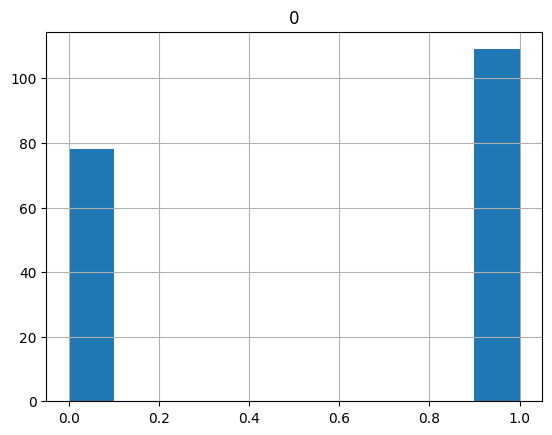

In [ ]:
pd.DataFrame(y_pred).hist()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [ ]:
accuracy

0.7005347593582888

In [ ]:
precision

0.6605504587155964

In [ ]:
recall

0.7912087912087912